# Chapter 10 - Exercises

## 1

### Answers

* a) no - looks fine as-is
* b) yes - attempt to make more linear
* c) yes - attempt to make spread more consistent

## 3

### Answers

* a) yes - seasonal pattern across year
* b) not any of those described in the ladder approach; maybe a time-series based re-expression

## 5

### Answers

* a) 16.445
* b) 7.840
* c) 0.357
* d) 1.75
* e) 27.59

In [1]:
import math
math.exp(1.2 + 0.8 * 2)

16.444646771097048

In [2]:
math.pow(1.2 + 0.8 * 2, 2)

7.839999999999999

In [3]:
math.exp(1.2 + 0.8 * math.log(2, math.e))

5.78065931459459

In [4]:
1 / (1.2 + .8 * 2)

0.35714285714285715

In [5]:
1.2 + 0.8 * math.log(2, math.e)

1.754517744447956

In [6]:
math.pow(10, 1.2 + 0.8 * math.log(2, 10))

27.59459322922429

## 7

### Answers

* a) straight, linear, negative, fairly strong
* b) for each 1000 lb increase in weight, gas mileage goes down by 7.56 mpg
* c) no - there's a clear curve in the regression plot

##  9

### Answers

* a) the residual variance is much smaller, and shows no clear pattern
* b) fuel consumption = 0.624932 + 1.17791 + weight
* c) for each 1000 lb increase in weight, fuel consumption goes up by 1.17791 gal / 100mi
* d) 21.063 mi/gallon

In [7]:
0.624932 + 1.17791 * 3.5
# 4.747617 gal / 100 miles
100 / (0.624932 + 1.17791 * 3.5)

21.063198653134826

## 11

### Answers

* a) not necessarily - it suggests that the model explains a lot of the variance in the response variable, but not that the model is _appropriate_
* b) no - clear curved pattern in residuals; emphasizing the curve in the original data

## 13

### Answers

* It's not clear that this is much better.  There's still a large change in direction, and what appear to be multiple fluctuations within the downward trend of the second part of the curve.

## 15

### Answers

* a) association appears linear and strong, but the residuals show a clear curved pattern
* b) use the sqrt of stopping dist
* c) yhat = 3.303404 + 0.235484 * x
* d) 264.23 ft
* e) 391.53 ft
* f) fairly confident; residuals don't show curved pattern; high r^2; low std error

In [8]:
# %load ../snippets/data-imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

from scipy import stats
import math

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [9]:
speed = [20, 20, 20, 30, 30, 30, 40, 40, 40, 50, 50, 50, 60, 60, 60]
stoppingDist = [64, 62, 59, 114, 118, 105, 153, 171, 165, 231, 203, 238, 317, 321, 276]
brakes = DataFrame(data={
    "speed": speed,
    "dist": stoppingDist
})
brakes.head()

,dist,speed
0,64,20
1,62,20
2,59,20
3,114,30
4,118,30


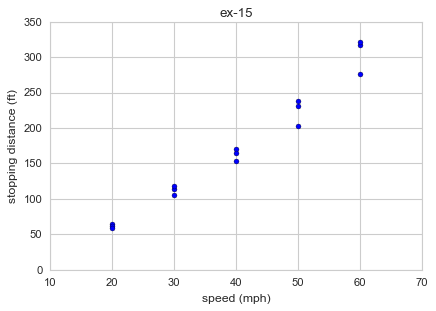

In [10]:
plt.scatter(brakes.speed, brakes.dist)
plt.xlabel("speed (mph)")
plt.ylabel("stopping distance (ft)")
plt.title("ex-15");

In [11]:
r = np.corrcoef(brakes.speed, brakes.dist)[0][1]
r

0.98462813853605058

In [12]:
b1 = r * (brakes.dist.std() / brakes.speed.std())
b1

5.9766666666666666

In [13]:
b0 = brakes.dist.mean() - b1 * brakes.speed.mean()
b0

-65.933333333333337

In [14]:
def stopping_dist(speed):
    return b0 + b1 * speed

In [15]:
brakes['predict'] = brakes.speed.apply(lambda x: stopping_dist(x))
brakes.head()

,dist,speed,predict
0,64,20,53.600000
1,62,20,53.600000
2,59,20,53.600000
3,114,30,113.366667
4,118,30,113.366667


In [16]:
brakes['residual'] = brakes.dist - brakes.predict
brakes.head()

,dist,speed,predict,residual
0,64,20,53.600000,10.400000
1,62,20,53.600000,8.400000
2,59,20,53.600000,5.400000
3,114,30,113.366667,0.633333
4,118,30,113.366667,4.633333


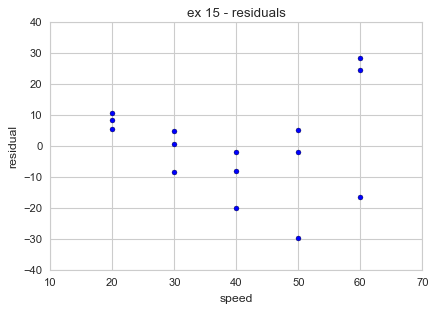

In [17]:
plt.scatter(brakes.speed, brakes.residual)
plt.xlabel("speed")
plt.ylabel("residual")
plt.title("ex 15 - residuals");

In [18]:
brakes["sqrt_dist"] = np.sqrt(brakes.dist)
brakes.head()

,dist,speed,predict,residual,sqrt_dist
0,64,20,53.600000,10.400000,8.000000
1,62,20,53.600000,8.400000,7.874008
2,59,20,53.600000,5.400000,7.681146
3,114,30,113.366667,0.633333,10.677078
4,118,30,113.366667,4.633333,10.862780


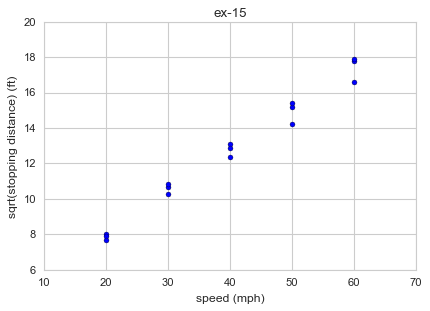

In [19]:
plt.scatter(brakes.speed, brakes.sqrt_dist)
plt.xlabel("speed (mph)")
plt.ylabel("sqrt(stopping distance) (ft)")
plt.title("ex-15");

In [20]:
import scipy.stats
lr = scipy.stats.linregress(brakes.speed, brakes.sqrt_dist)
b1 = lr.slope
b0 = lr.intercept
brakes.predict = b0 + b1 * brakes.speed
brakes.residual = brakes.sqrt_dist - brakes.predict
brakes.head()

,dist,speed,predict,residual,sqrt_dist
0,64,20,8.013074,-0.013074,8.000000
1,62,20,8.013074,-0.139066,7.874008
2,59,20,8.013074,-0.331928,7.681146
3,114,30,10.367909,0.309169,10.677078
4,118,30,10.367909,0.494871,10.862780


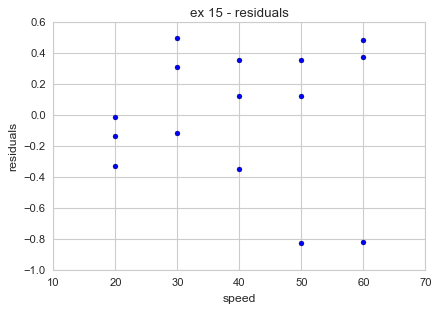

In [21]:
plt.scatter(brakes.speed, brakes.residual)
plt.xlabel("speed")
plt.ylabel("residuals")
plt.title("ex 15 - residuals");

In [22]:
print("yhat = %f + %f * x" % (b0, b1))

yhat = 3.303404 + 0.235484 * x


In [23]:
est = math.pow(3.303404 + 0.235484 * 70, 2)
est

391.536608096656

In [24]:
lr

LinregressResult(slope=0.23548350561825021, intercept=3.303404005127911, rvalue=0.99221941764255095, pvalue=3.774265671034281e-13, stderr=0.0081951278043788777)

In [25]:
print("R^2: %f" % (math.pow(lr.rvalue, 2)))

R^2: 0.984499


## 17

### Answers

* a) no - upward curve
* b) no - also has an upward curve
* c) apply sqrt to salary
* d) sqrt salary = 0.151 * year - 11.092

In [26]:
salaries = DataFrame(data = {
        "year": [80, 82, 90, 90, 91, 86, 97, 98, 99, 99, 99, 101, 101, 104, 105, 106, 107, 109],
        "salary": [1.0, 2.0, 3.0, 4.7, 5.3, 8.5, 11.0, 12.5, 12.5, 13.3, 15.0, 17.0, 22.0, 22.5, 26.0, 20.6, 23.4, 33.0]
    })

In [27]:
salaries.head()

,salary,year
0,1.0,80
1,2.0,82
2,3.0,90
3,4.7,90
4,5.3,91


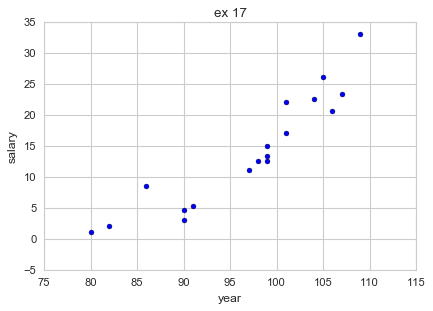

In [28]:
plt.scatter(salaries.year, salaries.salary)
plt.xlabel("year")
plt.ylabel("salary")
plt.title("ex 17");

In [29]:
lr1 = scipy.stats.linregress(salaries.year, salaries.salary)
lr1

LinregressResult(slope=0.98495473104917475, intercept=-81.358947274986704, rvalue=0.92363790344888763, pvalue=4.5660020371534743e-08, stderr=0.10217746345884038)

In [30]:
salaries['predict1'] = lr1.intercept + lr1.slope * salaries.year
salaries['residual1'] = salaries.salary - salaries.predict1
salaries.head()

,salary,year,predict1,residual1
0,1.0,80,-2.562569,3.562569
1,2.0,82,-0.592659,2.592659
2,3.0,90,7.286979,-4.286979
3,4.7,90,7.286979,-2.586979
4,5.3,91,8.271933,-2.971933


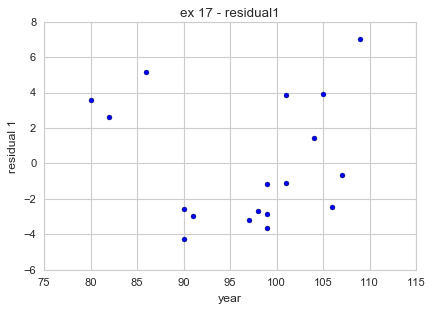

In [31]:
plt.scatter(salaries.year, salaries.residual1)
plt.xlabel("year")
plt.ylabel("residual 1")
plt.title("ex 17 - residual1");

In [32]:
salaries['sqrt_salary'] = np.sqrt(salaries.salary)
salaries.head()

,salary,year,predict1,residual1,sqrt_salary
0,1.0,80,-2.562569,3.562569,1.000000
1,2.0,82,-0.592659,2.592659,1.414214
2,3.0,90,7.286979,-4.286979,1.732051
3,4.7,90,7.286979,-2.586979,2.167948
4,5.3,91,8.271933,-2.971933,2.302173


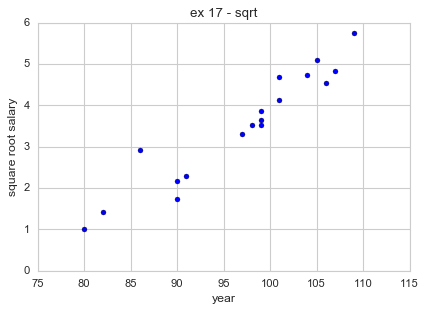

In [33]:
plt.scatter(salaries.year, salaries.sqrt_salary)
plt.xlabel("year")
plt.ylabel("square root salary")
plt.title("ex 17 - sqrt");

In [34]:
lr2 = scipy.stats.linregress(salaries.year, salaries.sqrt_salary)
lr2

LinregressResult(slope=0.15073034219600084, intercept=-11.092092545599478, rvalue=0.95344550843463172, pvalue=9.5834313611671061e-10, stderr=0.011918627894556227)

In [35]:
salaries['predict2'] = lr2.intercept + lr2.slope * salaries.year
salaries['residual2'] = salaries.sqrt_salary - salaries.predict2
salaries.head()

,salary,year,predict1,residual1,sqrt_salary,predict2,residual2
0,1.0,80,-2.562569,3.562569,1.000000,0.966335,0.033665
1,2.0,82,-0.592659,2.592659,1.414214,1.267796,0.146418
2,3.0,90,7.286979,-4.286979,1.732051,2.473638,-0.741587
3,4.7,90,7.286979,-2.586979,2.167948,2.473638,-0.305690
4,5.3,91,8.271933,-2.971933,2.302173,2.624369,-0.322196


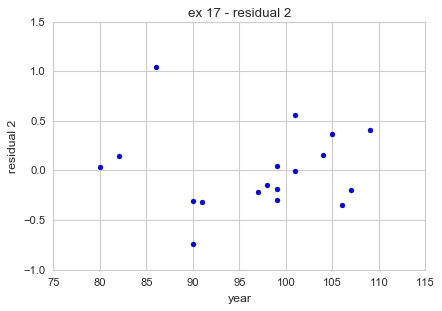

In [36]:
plt.scatter(salaries.year, salaries.residual2)
plt.xlabel("year")
plt.ylabel("residual 2")
plt.title("ex 17 - residual 2");

## 19

### Answers

* see below
* yes - the residual, in raw distance is ~-2 billion miles

In [60]:
planets = pd.read_table("../data/Planets.txt",  skiprows=1, names=["planet", "position", "distance"])
planets.head()

,planet,position,distance
0,Mercury,1,36
1,Venus,2,67
2,Earth,3,93
3,Mars,4,142
4,Jupiter,5,484


In [61]:
pluto = planets[planets.planet == 'Pluto']
pluto

,planet,position,distance
8,Pluto,9,3666


In [62]:
planets = planets[planets.planet != 'Pluto']

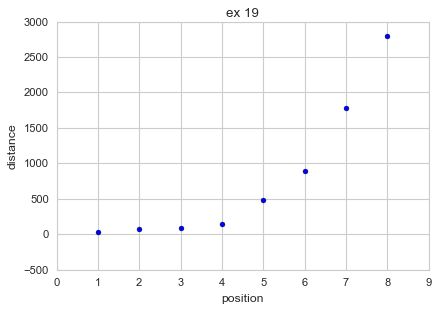

In [63]:
plt.scatter(planets.position, planets.distance)
plt.xlabel("position")
plt.ylabel("distance")
plt.title("ex 19");

In [86]:
planets['log_distance'] = np.log10(planets.distance)
planets.head()

,planet,position,distance,log_distance,prediction,residual
0,Mercury,1,36,1.556303,3.422450,0.161069
1,Venus,2,67,1.826075,4.075647,0.129045
2,Earth,3,93,1.968483,4.728845,-0.196245
3,Mars,4,142,2.152288,5.382042,-0.426215
4,Jupiter,5,484,2.684845,6.035239,0.146845


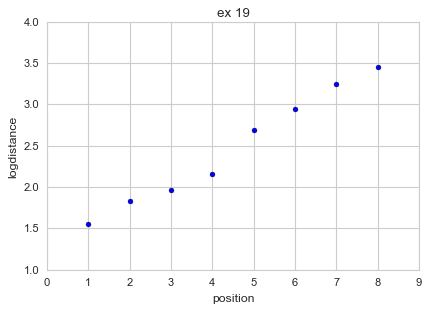

In [87]:
plt.scatter(planets.position, planets.log_distance)
plt.xlabel("position")
plt.ylabel("logdistance")
plt.title("ex 19");

In [88]:
plr = scipy.stats.linregress(planets.position, planets.log_distance)
plr

LinregressResult(slope=0.28368002299923351, intercept=1.2026710958778231, rvalue=0.99122459751946135, pvalue=1.6783340756818712e-06, stderr=0.015444530263976136)

In [89]:
planets['prediction'] = plr.intercept + plr.slope * planets.position
planets['residual'] = planets.log_distance - planets.prediction
planets.head()

,planet,position,distance,log_distance,prediction,residual
0,Mercury,1,36,1.556303,1.486351,0.069951
1,Venus,2,67,1.826075,1.770031,0.056044
2,Earth,3,93,1.968483,2.053711,-0.085228
3,Mars,4,142,2.152288,2.337391,-0.185103
4,Jupiter,5,484,2.684845,2.621071,0.063774


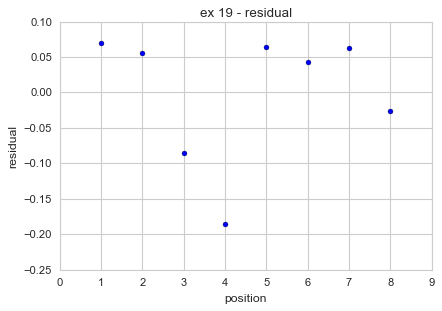

In [90]:
plt.scatter(planets.position, planets.residual)
plt.xlabel("position")
plt.ylabel("residual")
plt.title("ex 19 - residual");

In [91]:
pluto = math.pow(10, plr.intercept + plr.slope * 9)
pluto

5698.903497098489

In [92]:
residual = 3666 - pluto
residual

-2032.9034970984894

## 21

### Answers

* note: it's not clear from the question which position eris falls at, and based on that, whether our model should include or exclude pluto in the list of "planets" used in the training set.  attempts including and excluding pluto, using ln and log10 transforms all arrived at different predictions from the answer described in the keys
* it falls at the higher end of the residuals, but not outside the range shown by other planets

In [94]:
prediction = (plr.intercept + plr.slope * 9)
prediction

3.7557913028709247

In [96]:
math.pow(10, prediction)

5698.903497098489

In [95]:
residual = np.log10(6300) - prediction
residual

0.04354924658265702

In [82]:
planets

,planet,position,distance,log_distance,prediction,residual
0,Mercury,1,36,3.583519,3.422450,0.161069
1,Venus,2,67,4.204693,4.075647,0.129045
2,Earth,3,93,4.532599,4.728845,-0.196245
3,Mars,4,142,4.955827,5.382042,-0.426215
4,Jupiter,5,484,6.182085,6.035239,0.146845
5,Saturn,6,887,6.787845,6.688437,0.099408
6,Uranus,7,1784,7.486613,7.341634,0.144979
7,Neptune,8,2796,7.935945,7.994832,-0.058887


## 23

### Answers

* a) board_ft = (diameter - 4)^2
* b) 36 board ft
* c) 1024 board ft

In [106]:
diameter = [8, 12, 16, 20, 24, 28]
board_ft = [16, 64, 144, 256, 400, 576]
logs = DataFrame(data = {
        "diameter": diameter,
        "board_ft": board_ft
    })
logs.head()

,board_ft,diameter
0,16,8
1,64,12
2,144,16
3,256,20
4,400,24


In [107]:
np.sqrt(board_ft)

array([  4.,   8.,  12.,  16.,  20.,  24.])

In [108]:
np.power(logs.diameter - 4, 2)

0     16
1     64
2    144
3    256
4    400
5    576
Name: diameter, dtype: int64

In [109]:
math.pow(10 - 4, 2)

36.0

In [110]:
math.pow(36 - 4, 2)

1024.0

## 25

### Answers

* ln(life expect) = 3.7918 + 0.2124 * ln(year index -- decades after 1890)

In [143]:
year_idx = [x + 1 for x in range(11)]
life_exp = [46.6, 48.6, 54.4, 59.7, 62.1, 66.5, 67.4, 68.0, 70.7, 72.7, 74.9]
le = DataFrame(data = {
        "year": year_idx,
        "expect": life_exp
    })
le

,expect,year
0,46.6,1
1,48.6,2
2,54.4,3
3,59.7,4
4,62.1,5
5,66.5,6
6,67.4,7
7,68.0,8
8,70.7,9
9,72.7,10


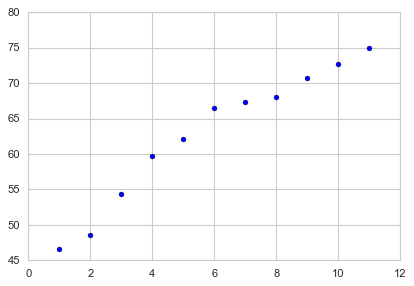

In [144]:
plt.scatter(le.year, le.expect);

In [145]:
lr = scipy.stats.linregress(le.year, le.expect)
lr

LinregressResult(slope=2.8063636363636371, intercept=46.034545454545452, rvalue=0.97388875441247658, pvalue=4.2346950008455766e-07, stderr=0.21806625727513076)

In [146]:
le['prediction'] = lr.intercept + lr.slope * le.year
le['residual'] = le.expect - le.prediction
le.head()

,expect,year,prediction,residual
0,46.6,1,48.840909,-2.240909
1,48.6,2,51.647273,-3.047273
2,54.4,3,54.453636,-0.053636
3,59.7,4,57.260000,2.440000
4,62.1,5,60.066364,2.033636


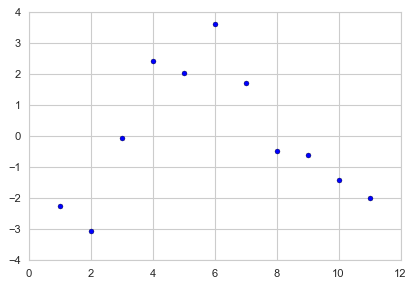

In [147]:
plt.scatter(le.year, le.residual);

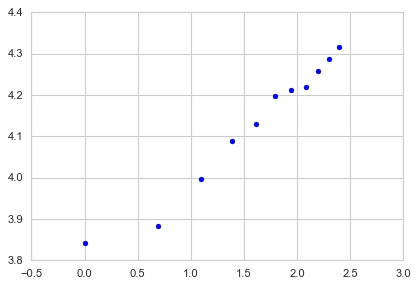

In [154]:
le['log_expect'] = np.log(le.expect)
le['log_year'] = np.log(le.year)
plt.scatter(le.log_year, le.log_expect)

In [155]:
lr = scipy.stats.linregress(le.log_year, le.log_expect)
lr

LinregressResult(slope=0.21241625477976672, intercept=3.7918351883032946, rvalue=0.98533978962481317, pvalue=3.2055619999885509e-08, stderr=0.012259365591687752)

In [156]:
le['log_predict'] = lr.intercept + lr.slope * le.log_year
le['log_resid'] = le.log_expect - le.log_predict
le.head()

,expect,year,prediction,residual,log_expect,log_year,log_predict,log_resid
0,46.6,1,48.840909,-2.240909,3.841601,0.000000,3.791835,0.049765
1,48.6,2,51.647273,-3.047273,3.883624,0.693147,3.939071,-0.055447
2,54.4,3,54.453636,-0.053636,3.996364,1.098612,4.025198,-0.028834
3,59.7,4,57.260000,2.440000,4.089332,1.386294,4.086307,0.003025
4,62.1,5,60.066364,2.033636,4.128746,1.609438,4.133706,-0.004960


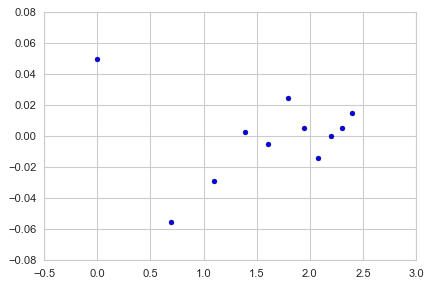

In [157]:
plt.scatter(le.log_year, le.log_resid);

## 27

### Answers

* tried all suggested re-expressions on ladder, none produced straight line

In [158]:
speed = [35, 40, 45, 50, 55, 60, 65, 70, 75]
mileage = [25.9, 27.7, 28.5, 29.5, 29.2, 27.4, 26.4, 24.2, 22.8]
df = DataFrame(data={ "speed": speed, "mileage": mileage })
df.head()

,mileage,speed
0,25.9,35
1,27.7,40
2,28.5,45
3,29.5,50
4,29.2,55


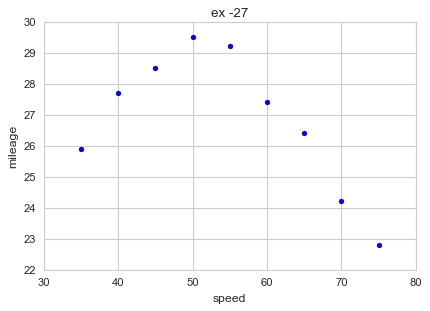

In [159]:
plt.scatter(df.speed, df.mileage)
plt.xlabel("speed")
plt.ylabel("mileage")
plt.title("ex -27");

## 29

### Answers

* a) years left=(8.465 -0.069 * age) ^ 2
* b) 52.1 years
* c) No - there's clear curvature and a change in direction in the residual plot; unable to remove curvature with other transforms.

In [160]:
age = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
years = [60.3, 50.7, 41.8, 32.9, 24.8, 17.9, 12.1, 7.9, 5.0, 3.0]
df = DataFrame(data={"age": age, "years": years})
df.head()

,age,years
0,10,60.3
1,20,50.7
2,30,41.8
3,40,32.9
4,50,24.8


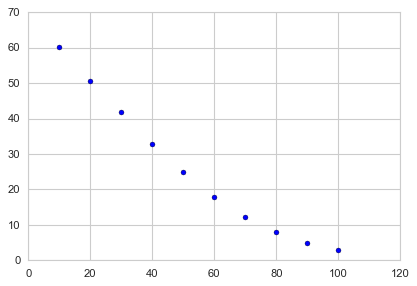

In [161]:
plt.scatter(df.age, df.years);

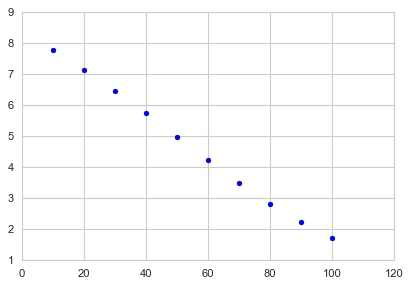

In [164]:
df['sqrt_yrs'] = np.sqrt(df.years)
plt.scatter(df.age, df.sqrt_yrs);

In [166]:
lr = scipy.stats.linregress(df.age, df.sqrt_yrs)
lr

LinregressResult(slope=-0.069262871575906756, intercept=8.4649541262842227, rvalue=-0.99892219708435515, pvalue=5.8962197632309639e-12, stderr=0.0011378668843463394)

In [167]:
b = math.pow(lr.intercept + lr.slope * 18, 2)
b

52.10273516326144

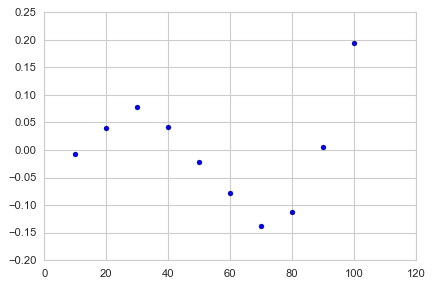

In [168]:
df['predictions'] = lr.intercept + lr.slope * df.age
df['residuals'] = df.sqrt_yrs - df.predictions
plt.scatter(df.age, df.residuals);